# Decision Tree

In this Jupyter notebook, we will introduce one of the most popular supervised machine learning algorithms called decision tree. It can be used for both regression and classification algorithm. Here we mainly discuss decision tree from classification perspective.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import uuid
import copy

from abc import ABCMeta, abstractmethod

sns.set()
%matplotlib inline

## Introduction 

The basic idea of the tree based algorithms is to split the feature space into a set of simple regions. Any given decision tree consists of three types of nodes as depicted in **Figure 1**.

<p><center><img src="images/basic_tree.png" alt="drawing" height="40%" width="40%"></center></p>
<p><center><b>Figure 1</b>:  Three types of nodes in a typical tree-based algorithm</center></p>

At each internal node as well as in the root node, we ask a question (more details are given below) to partition our data into different segments. For instance, suppose we build a tree for predicting credit risk. So one of the questions we might ask is "How good the applicant's credit history?". Since partition tules (or questions) can be represented as a tree, we categorize these types of methods as tree-based algorithms.


## Building Tree Model

It is easy to explain the decision tree building process with a 2-D dataset. So consider a dataset with two features: $\{(X_1, X_2)\;|\;X_1, X_2 \in \mathbb{R}\}$ and corresponding response is $y \in \mathbb{R}$. The algorithm works as follows.

1. First, we pick a feature (say $X_1$) from the available features (in this case $X_1$, and $X_2$).
2. Next, we select a threshold (say $t_1$). So all the data where $X_1 <= t_1$ will go to the left sub-tree and the rest will go to the right sub-tree.
3. We continue this process until the stopping criteria are met.

An example tree with decision rules is given in **Figure: 2**:

<p><center><img src="images/tree_building.png" alt="drawing" height="40%" width="40%"></center></p>
<p><center><b>Figure 2</b>: An example tree with decision rules.</center></p>


OK, now we know at high-level how the tree-based algorithms work. However, still, we can't go ahead and code our very own classification tree algorithm. Because there are three black boxes in our tree building algorithm as enumerated below:

1. How to select a feature out of a collection of candidate features?
2. How to select a split point?
3. When are we going to stop the recursive tree building process?

So let's understand how these black boxes work.

### How to select a feature out of a collection of candidate features?


###  How to select a split point?

###  When are we going to stop the recursive tree building process?

## Splitting Data into Different Regions
<p><center><img src="images/tree_partition.png" alt="drawing" height="30%" width="30%"></center></p>
<p><center><b>Figure 3</b>: Basic Tree Terminology</center></p>

## How to Choose Best Split?

## Decision Tree Algorithm

$$H(S)=-\sum_{c \in C}p(c)log_2\big(p(c)\big)$$

In [2]:
N = 250
np.random.seed(1024)

mean_cls_0 = np.array([-2, -2])
cov_cls_0 = np.array([[1.5, 0], [0, 1.5]])
x0 = np.random.multivariate_normal(mean=mean_cls_0, cov=cov_cls_0, size=N)
y0 = np.zeros(N)

mean_cls_1 = np.array([2, 2])
cov_cls_1 = np.array([[1.5, 0], [0, 1.5]])
x1 = np.random.multivariate_normal(mean=mean_cls_1, cov=cov_cls_1, size=N)
y1 = np.ones(N)

mean_cls_2 = np.array([-4, 4])
cov_cls_2 = np.array([[2.5, 0], [0, 2.5]])
x2 = np.random.multivariate_normal(mean=mean_cls_2, cov=cov_cls_2, size=N)
y2 = np.full(N, 2)

X_train = np.row_stack((x0, x1, x2))
y_train = np.concatenate((y0, y1, y2)).astype(np.int16)

fig = plt.figure(figsize=(10, 6))
axes = plt.axes()
axes.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=50,
    cmap=plt.cm.Spectral,
    alpha=0.75,
    edgecolors='none')
axes.set_xlabel('first feature')
axes.set_ylabel('second feature')
axes.set_title('Generated Three-Class Classification Dataset')
plt.show()

In [3]:
def entropy(x):
    # remove all zero and negative values
    x = x[x > 0]
    return -np.sum(x * np.log2(x))

$$I = H(S) - \sum_{i \in (1, 2)}\frac{S^{i}}{S}H(S^{i})$$

In [4]:
def entropy(x):
    x = x[x > 0]
    return -np.sum(x * np.log(x))


def information_gain(y, y_left, y_right):
    n = y.shape[0]
    n_l = y_left.shape[0]
    if n_l == 0:
        H_l = 0.0
    else:
        H_l = entropy(y_left.mean(axis=0))

    n_r = y_right.shape[0]
    if n_r == 0:
        H_r = 0
    else:
        H_r = entropy(y_right.mean(axis=0))

    H = entropy(y.mean(axis=0))
    return H - n_l / n * H_l - n_r / n * H_r


def predict_node_label(values, num_distinct_classes):
    probabilities = predict_node_probability(values, num_distinct_classes)
    return np.argmax(probabilities)


def predict_node_probability(values, num_distinct_classes):
    return np.bincount(values, minlength=num_distinct_classes) / values.shape[0]

class HyperParameterException(Exception):
    pass

In [5]:
class Node(object):
    def __init__(self, node_id=None, description=None):
        self.id = node_id
        self.description = description

    def set_id(self, id):
        self.id = id

    def get_id(self):
        return str(self.id)

    def set_description(self, description):
        self.description = description

    def get_description(self):
        return self.description


class Leaf(Node):
    def __init__(self, values, n_classes=None, node_id=None, description=None):
        Node.__init__(self, node_id, description)
        self.values = values

    def get_values(self):
        return self.values


class Internal(Node):
    def __init__(self, dim, threshold, left_child, right_child, node_id=None, description=None):
        Node.__init__(self, node_id, description)
        self.dim = dim
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child

In [6]:
class BaseTree(metaclass=ABCMeta):
    def __init__(self, max_depth=None, n_min_leaf=2, n_trials=None):
        self.max_depth = max_depth
        self.n_min_leaf = n_min_leaf
        self.n_trials = n_trials
        self.root_node = None
        self.num_classes = None

    def fit(self, X, y):
        self.num_classes = np.unique(y).shape[0]
        self._fit_training_data(X, y,
                                max_depth=self.max_depth,
                                n_min_leaf=self.n_min_leaf,
                                n_trials=self.n_trials)

    def predict(self, X):
        y_predict = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            pointer = copy.copy(self.root_node);
            y_predict[i] = self._predict_single_data_point(X[i, :], pointer)
        return y_predict

    def visualize(self, file_name, file_format='png'):
        queue = [self.root_node]
        children = {}
        graph = gv.Digraph(format=file_format)

        while queue:
            vertex = queue.pop(0)
            graph.node(name=vertex.get_id(), label=vertex.get_description())
            if type(vertex) is Internal:
                queue.append(vertex.right_child)
                queue.append(vertex.left_child)
                children[vertex.get_id()] = (vertex.right_child.get_id(),
                                             vertex.left_child.get_id())

        for key, val in children.items():
            true_flag = True
            for child in val:
                if true_flag:
                    graph.edge(key, child, 'True')
                    true_flag = False
                else:
                    graph.edge(key, child, 'False')
        graph.render(file_name)

    # private methods
    def _build_node_description(self, values):
        probabilities = predict_node_probability(values, self.num_classes)
        desc = ''
        for i in range(probabilities.shape[0]):
            desc += 'class: {}  prob: {} \n'.format(i, probabilities[i])
        desc += 'samples: {}\n'.format(values.shape[0])
        return desc

    def _fit_training_data(self, X, y, max_depth=None, n_min_leaf=None, n_trials=None):
        if np.all(y == y[0]):
            return Leaf(y, self.num_classes, node_id=uuid.uuid4(),
                        description=self._build_node_description(y))

        if max_depth is not None and max_depth <= 0:
            return Leaf(y, self.num_classes, node_id=uuid.uuid4(),
                        description=self._build_node_description(y))

        split_parameters = self._split_parameters(X,
                                                  y,
                                                  n_min_leaf=n_min_leaf,
                                                  n_trials=n_trials)
        if split_parameters is None:
            return Leaf(y, self.num_classes, node_id=uuid.uuid4(),
                        description=self._build_node_description(y))

        split_dim, split_threshold = split_parameters
        mask_left = X[:, split_dim] <= split_threshold
        mask_right = np.logical_not(mask_left)

        left_child = self._fit_training_data(
            X[mask_left],
            y[mask_left],
            max_depth=max_depth - 1 if max_depth is not None else None)

        right_child = self._fit_training_data(
            X[mask_right],
            y[mask_right],
            max_depth=max_depth - 1 if max_depth is not None else None)

        description = 'feature:[{}] <= {}'.format(split_dim, split_threshold)
        self.root_node = Internal(
            dim=split_dim,
            threshold=split_threshold,
            left_child=left_child,
            right_child=right_child,
            node_id=uuid.uuid4(),
            description=description)
        return self.root_node

    def _split_parameters(self, X, Y, n_min_leaf=None, n_trials=None):

        if n_min_leaf is not None and n_min_leaf >= Y.shape[0]:
            return None

        candidate_indices = None
        if n_trials is not None:
            if n_trials > X.shape[1]:
                raise HyperParameterException('n_trials should be less than number of features')
            else:
                candidate_indices = np.random.choice(X.shape[1], size=n_trials, replace=False)

        best_gain = float('-inf')
        best_dimension = None
        best_threshold = None
        if candidate_indices is None:
            candidate_indices = range(X.shape[1])

        for dim in candidate_indices:
            feature = X[:, dim]
            threshold, info_grain = self._find_best_split_threshold(feature, Y)
            if info_grain >= best_gain:
                best_dimension = dim
                best_gain = info_grain
                best_threshold = threshold

        if best_threshold is None:
            return None
        else:
            return best_dimension, best_threshold

    @abstractmethod
    def _find_best_split_threshold(self, feature_vector, response):
        pass

    @abstractmethod
    def _predict_single_data_point(self, X, node, emit_probability=False):
        pass


class ClassificationTree(BaseTree):
    def __init__(self, max_depth=None, n_min_leaf=2, n_trials=None):
        super().__init__(max_depth, n_min_leaf, n_trials)

    def predict_probability(self, X):
        y_predict = np.zeros((X.shape[0], self.num_classes))
        for i in range(X.shape[0]):
            pointer = copy.copy(self.root_node);
            y_predict[i,] = self._predict_single_data_point(X[i, :], pointer, emit_probability=True)
        return y_predict

    def _find_best_split_threshold(self, feature_vector, response):
        x = np.copy(feature_vector)
        y = np.copy(response)
        
        assert len(x.shape) == 1
        assert len(y.shape) == 1
        
        sorted_args = np.argsort(x)
        x = x[sorted_args]
        y = y[sorted_args]
        
        best_info_gain = float('-inf')
        best_split = None
        
        for i in range(x.shape[0] - 1):
            mid = (x[i] + x[i+1]) / 2.0
            less_than_or_eq_indices = np.where(x <= mid)
            greater_than_indices = np.where(x > mid)
            info_gain = information_gain(y,
                                         y[less_than_or_eq_indices],
                                         y[greater_than_indices])
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_split = mid
        
        return best_split, best_info_gain
            
#         unique_features = np.unique(feature_vector)
#         best_info_gain = float('-inf')
#         best_category = None
#         for feature in range(unique_features.shape[0]):
#             less_than_or_eq_indices = np.where(feature_vector <= unique_features[feature])[0]
#             greater_than_indices = np.where(feature_vector > unique_features[feature])[0]
#             info_gain = information_gain(response,
#                                          response[less_than_or_eq_indices],
#                                          response[greater_than_indices])
#             if info_gain > best_info_gain:
#                 best_info_gain = info_gain
#                 best_category = unique_features[feature]
#         return best_category, best_info_gain
        
    

    def _predict_single_data_point(self, X, node, emit_probability=False):
        if type(node) is Leaf:
            if emit_probability:
                return predict_node_probability(node.get_values(), self.num_classes)
            else:
                return predict_node_label(node.get_values(), self.num_classes)
        else:
            dim = node.dim
            feature = X[dim]
            if feature <= node.threshold:
                return self._predict_single_data_point(X, node.left_child, emit_probability)
            else:
                return self._predict_single_data_point(X, node.right_child, emit_probability)


Finally, we have completed our very own decision tree algorithm. Let's build a tree model for our generated dataset.

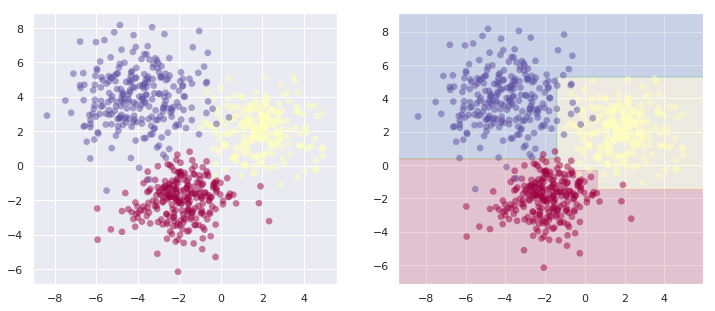

In [7]:
model = ClassificationTree(max_depth=3, n_min_leaf=10)
model.fit(X_train, y_train)

x0_features = np.arange(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 0.05)
x1_features = np.arange(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 0.05)

x0_features, x1_features = np.meshgrid(x0_features, x1_features)

y_pred = model.predict(
    np.column_stack((x0_features.flatten(), x1_features.flatten())))
y_pred = y_pred.reshape(x0_features.shape)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=45,
    cmap=plt.cm.Spectral,
    alpha=0.5,
    edgecolors='none')

ax2.contourf(x0_features, x1_features, y_pred, alpha=0.2, cmap=plt.cm.Spectral)
ax2.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=45,
    cmap=plt.cm.Spectral,
    alpha=0.5,
    edgecolors='none')

plt.show()

Next, let's investigate the effect of tree depth (**`max_depth`**) on the decision boundary.

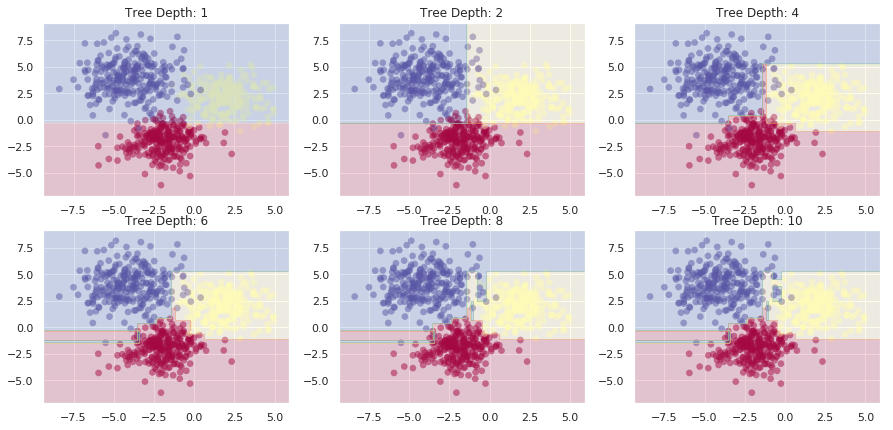

In [8]:
def plot_subplot(axis, X, y, tree_depth,
                color='#dd1c77', alpha=0.5, edgecolors='none'):
    
    def fit_predict(X_train, y_train, tree_depth, n_min_leaf=5):
        model = ClassificationTree(max_depth=tree_depth, n_min_leaf=n_min_leaf)
        model.fit(X_train, y_train)
        
        x0_features = np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.05)
        x1_features = np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.05)
        x0_features, x1_features = np.meshgrid(x0_features, x1_features)

        y_pred = model.predict(
        np.column_stack((x0_features.flatten(), x1_features.flatten())))
        y_pred = y_pred.reshape(x0_features.shape)        
        return x0_features, x1_features, y_pred
    
    axis.scatter(X[:, 0], X_train[:, 1], c=y, alpha=alpha, 
                 edgecolors=edgecolors, cmap=plt.cm.Spectral, s=45)
    x0_features, x1_features, y_pred = fit_predict(X, y, tree_depth)
    axis.contourf(x0_features, x1_features, y_pred, alpha=0.2, cmap=plt.cm.Spectral)
    axis.set_title('Tree Depth: {}'.format(tree_depth))


fig, axes = plt.subplots(2, 3, figsize=(15, 7))
tree_depths = iter([1, 2, 4, 6, 8, 10])

for i in range(2):
    for j in range(3):
        plot_subplot(axes[i][j], X_train, y_train, next(tree_depths))
plt.show()

## Summary



## References and Further Reading

1. https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/decisionForests_MSR_TR_2011_114.pdf [Decision Forests for Classification, Regression, Density Estimation, Manifold Learning and Semi-Supervised Learning]

2. https://www.youtube.com/watch?v=-dCtJjlEEgM&list=PLE6Wd9FR--EdyJ5lbFl8UuGjecvVw66F6&index=11 [Really good introduction to decision tree building by prof: Nando de Freitas]